In [1]:
# Tutorial https://www.datacamp.com/tutorial/geospatial-data-python

In [2]:
 # Load all importance packages
import geopandas
import numpy as np
import pandas as pd
from shapely.geometry import Point

# import missingno as msn

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

ERROR 1: PROJ: proj_create_from_database: Open of /opt/sw/anaconda3/2023.09/envs/pangeoai23/share/proj failed


        GEO_ID STATE        NAME LSAD  CENSUSAREA  \
0  0400000US01    01     Alabama        50645.326   
1  0400000US02    02      Alaska       570640.950   
2  0400000US04    04     Arizona       113594.084   
3  0400000US05    05    Arkansas        52035.477   
4  0400000US06    06  California       155779.220   

                                            geometry  
0  MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ...  
1  MULTIPOLYGON (((-166.10574 53.98861, -166.0752...  
2  POLYGON ((-112.53859 37.00067, -112.53454 37.0...  
3  POLYGON ((-94.04296 33.01922, -94.04304 33.079...  
4  MULTIPOLYGON (((-122.42144 37.86997, -122.4213...  


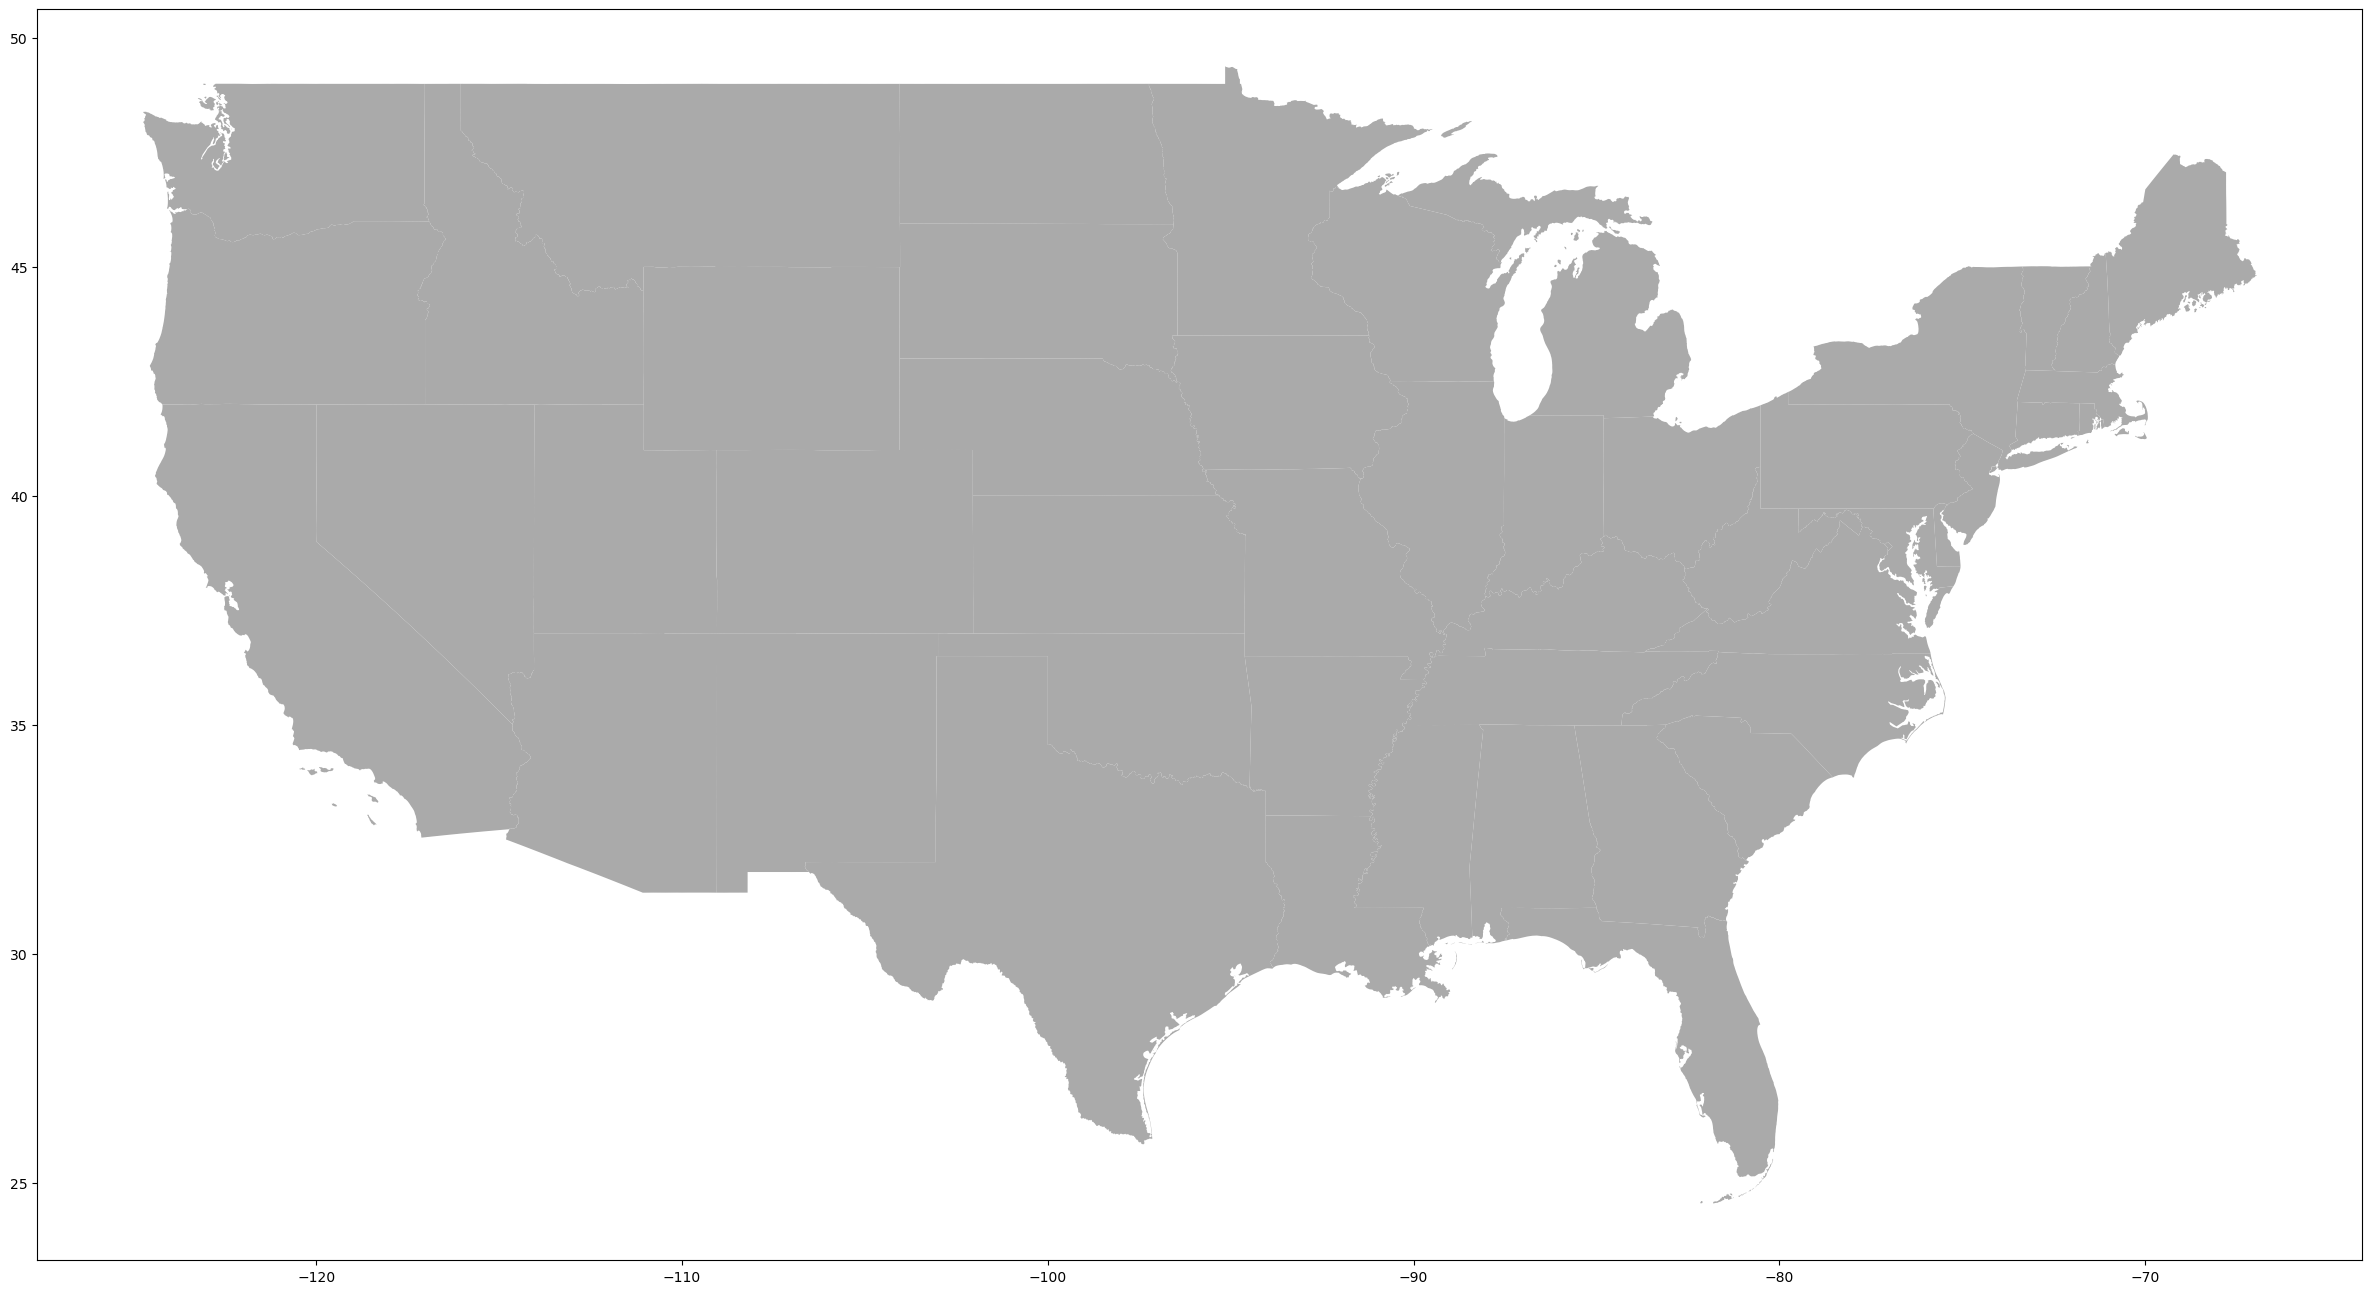

In [3]:

#Get GEOJSON
country = geopandas.read_file("./gz_2010_us_040_00_5m.json")
print(country.head()) #show the head of the data
# type(country) # show the data type
#type(country.geometry[0]) # show the data type for geo element

# Exclude Alaska and Hawaii for now
country[country['NAME'].isin(['Alaska','Hawaii','Puerto Rico']) == False].plot(figsize=(30,20), color='#AAAAAA');


In [4]:
florence = pd.read_csv('./Florence-2018.csv')
florence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AdvisoryNumber  105 non-null    object 
 1   Date            105 non-null    object 
 2   Lat             105 non-null    float64
 3   Long            105 non-null    float64
 4   Wind            105 non-null    int64  
 5   Pres            105 non-null    int64  
 6   Movement        105 non-null    object 
 7   Type            105 non-null    object 
 8   Name            105 non-null    object 
 9   Received        105 non-null    object 
 10  Forecaster      104 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 9.1+ KB


In [5]:
florence.describe()

,Lat,Long,Wind,Pres
count,105.000000,105.000000,105.000000,105.000000
mean,25.931429,56.938095,74.428571,981.571429
std,7.975917,20.878865,36.560765,22.780667
min,12.900000,18.400000,25.000000,939.000000
25%,18.900000,41.000000,40.000000,956.000000
50%,25.100000,60.000000,70.000000,989.000000
75%,33.600000,76.400000,105.000000,1002.000000
max,42.600000,82.900000,140.000000,1008.000000


In [6]:
#florence = florence.drop(['AdvisoryNumber', 'Forecaster', 'Received'], axis=1)
florence['Long'] = 0 - florence['Long'] # West needs to be a negative coord
florence['coordinates'] = florence[['Long', 'Lat']].values.tolist()
florence['coordinates'] = florence['coordinates'].apply(Point) # Turn coordinates into a point data type
florence = geopandas.GeoDataFrame(florence, geometry='coordinates') #Convert to geodataframe.GeoDataFrame
florence.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,coordinates
0,1,08/30/2018 11:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 10:45,Avila,POINT (-18.40000 12.90000)
1,1A,08/30/2018 14:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 13:36,Avila,POINT (-19.00000 12.90000)
2,2,08/30/2018 17:00,12.9,-19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 16:36,Avila,POINT (-19.40000 12.90000)
3,2A,08/30/2018 20:00,13.1,-20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 19:44,Beven,POINT (-20.40000 13.10000)
4,3,08/30/2018 23:00,13.2,-20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 22:42,Beven,POINT (-20.90000 13.20000)


In [7]:
florence[florence['Name']=='Six'] # Filetering from before hurricane was named

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,coordinates
0,1,08/30/2018 11:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 10:45,Avila,POINT (-18.40000 12.90000)
1,1A,08/30/2018 14:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 13:36,Avila,POINT (-19.00000 12.90000)
2,2,08/30/2018 17:00,12.9,-19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 16:36,Avila,POINT (-19.40000 12.90000)
3,2A,08/30/2018 20:00,13.1,-20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 19:44,Beven,POINT (-20.40000 13.10000)
4,3,08/30/2018 23:00,13.2,-20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 22:42,Beven,POINT (-20.90000 13.20000)
5,3A,08/31/2018 02:00,13.4,-21.2,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,08/31/2018 01:42,Berg,POINT (-21.20000 13.40000)
6,4,08/31/2018 05:00,13.6,-21.4,35,1006,WNW at 12 MPH (285 deg),Potential Tropical Cyclone,Six,08/31/2018 04:39,Berg,POINT (-21.40000 13.60000)
7,4A,08/31/2018 08:00,13.7,-21.8,35,1006,WNW at 12 MPH (285 deg),Potential Tropical Cyclone,Six,08/31/2018 07:33,Avila,POINT (-21.80000 13.70000)
8,5,08/31/2018 11:00,13.7,-22.7,35,1006,WNW at 13 MPH (285 deg),Potential Tropical Cyclone,Six,08/31/2018 10:38,Avila,POINT (-22.70000 13.70000)
9,5A,08/31/2018 14:00,13.8,-23.3,35,1006,WNW at 13 MPH (285 deg),Potential Tropical Cyclone,Six,08/31/2018 13:33,Avila,POINT (-23.30000 13.80000)


In [8]:
florence.groupby('Name').Type.count() # Group by name

Name
FLORENCE     6
Florence    85
SIX          4
Six         10
Name: Type, dtype: int64

In [9]:
print("Mean wind speed of Hurricane Florence is {} mph and it can go up to {} mph maximum".format(round(florence.Wind.mean(),4),
                                                                                         florence.Wind.max()))

#or...
windSpeedAvg = round(florence.Wind.mean(),4)
windSpeedMax = florence.Wind.max()
print(f"Mean wind speed: {windSpeedAvg}, Max wind speed: {windSpeedMax}")

Mean wind speed of Hurricane Florence is 74.4286 mph and it can go up to 140 mph maximum
Mean wind speed: 74.4286, Max wind speed: 140


<Axes: >

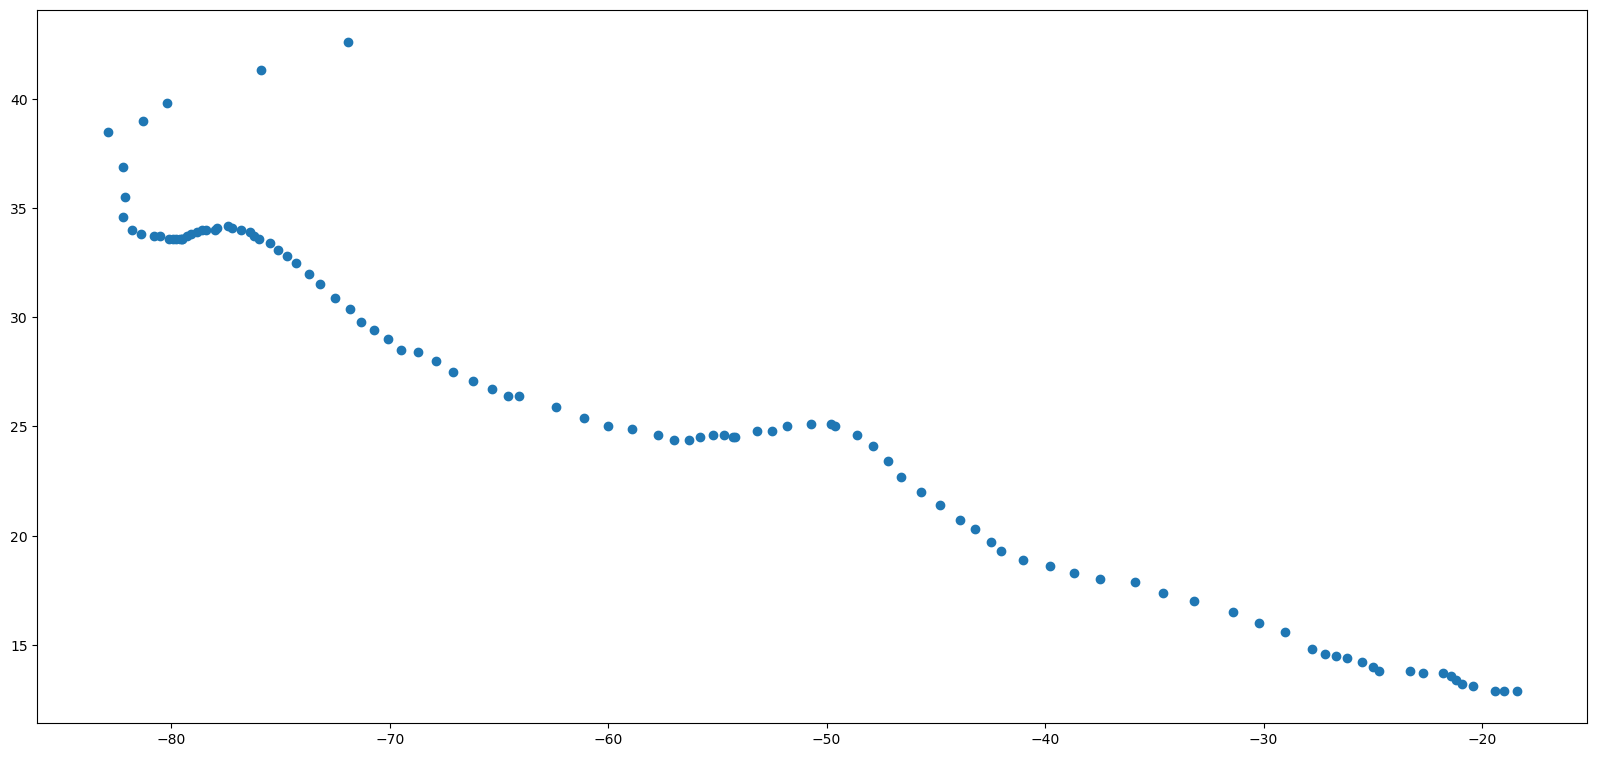

In [16]:
florence['Long'] = 0 - florence['Long'] # West needs to be a negative coord
florence.plot(figsize=(20,10))

Text(0.5, 1.0, 'Hurricane Florence Storm Path 2018')

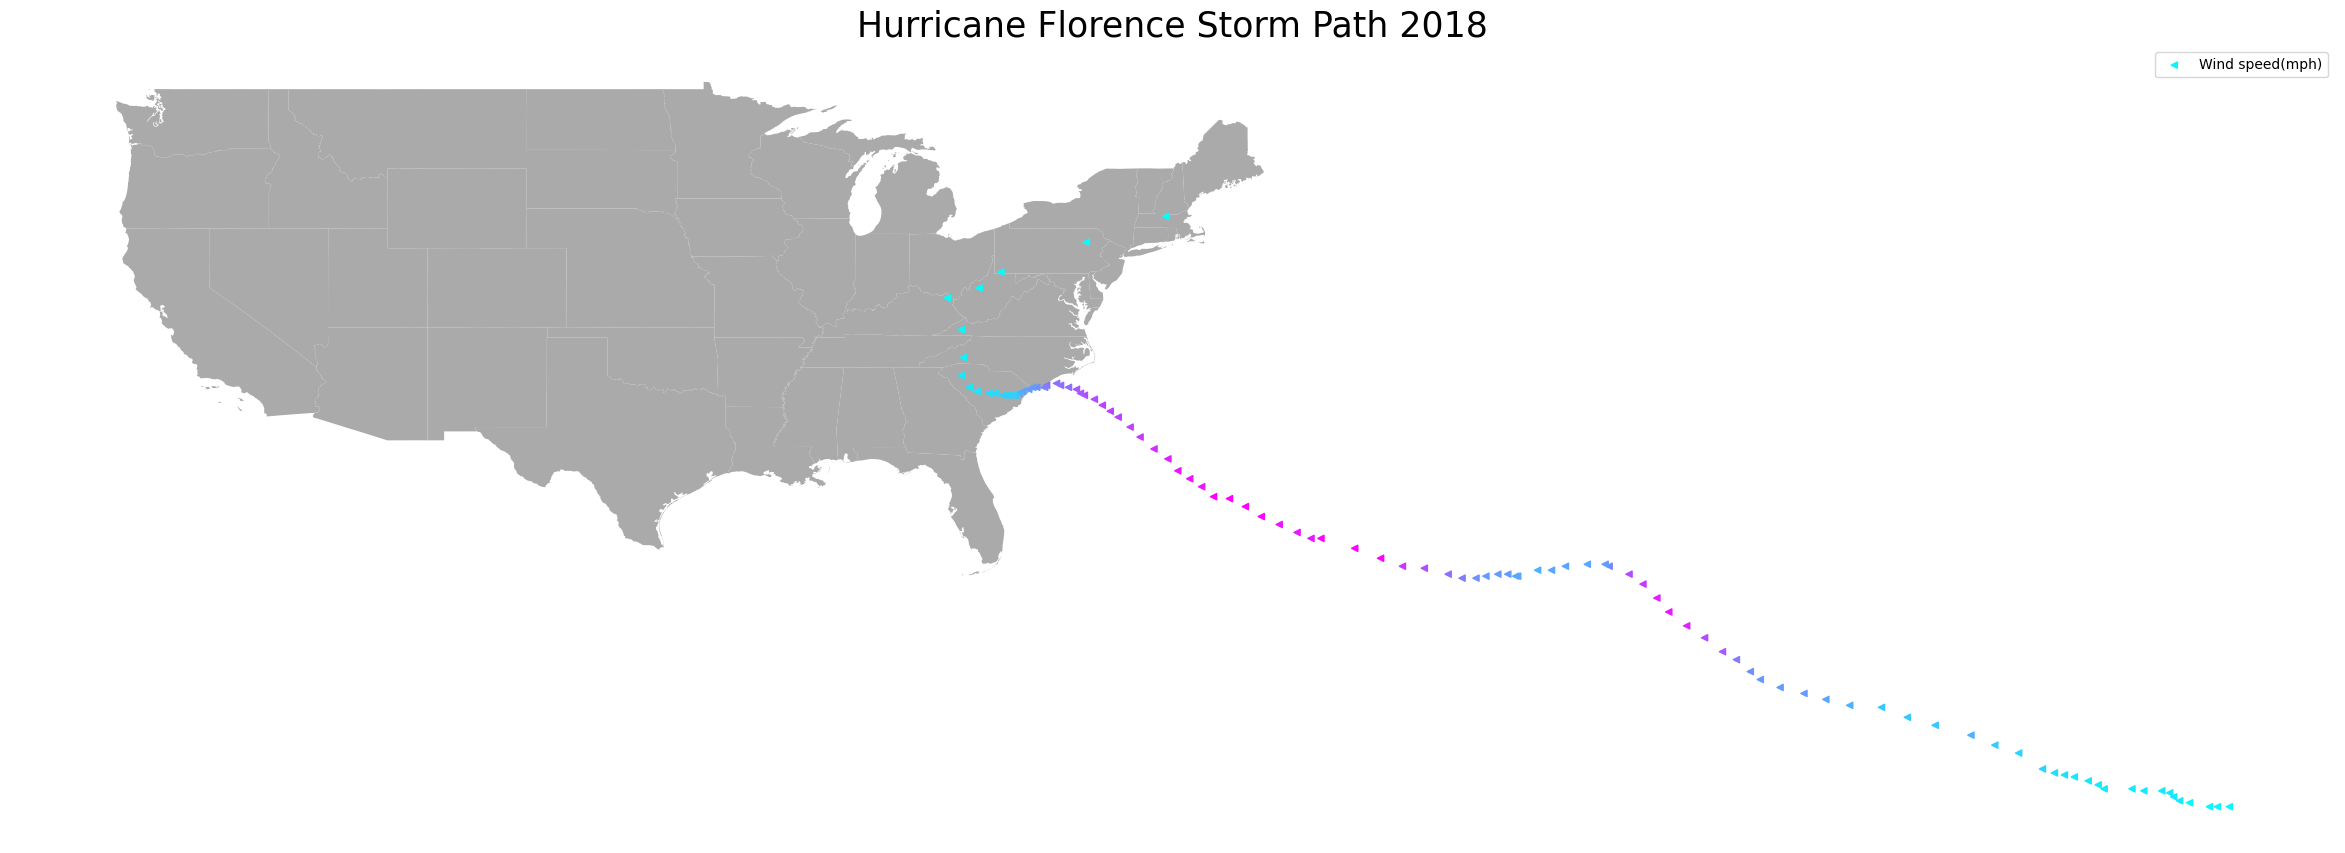

In [20]:
# Bring it all together

fig, ax = plt.subplots(1, figsize=(30,20))
base = country[country['NAME'].isin(['Alaska','Hawaii','Puerto Rico']) == False].plot(ax=ax, color='#AAAAAA');
#florence.plot(ax = base, color='darkred', marker='*', markersize=10)
florence.plot(ax=base, column='Wind', marker="<", markersize=20, cmap='cool', label="Wind speed(mph)")
_ = ax.axis('off')
plt.legend()
ax.set_title("Hurricane Florence Storm Path 2018", fontsize=25)
plt.savefig('./HurricaneFlorence-2018-Fig.png', bbox_inches='tight')